<a href="https://colab.research.google.com/github/kdurai/DeepLearning/blob/master/0205_DNNLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

Using TensorFlow backend.


In [3]:
#!wget "https://query1.finance.yahoo.com/v7/finance/download/%5EVIX?period1=1554121150&period2=1556713150&interval=1d&events=history&crumb=M6BhQsZUssg"
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 2.9MB/s 


In [11]:
# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.txt' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title File2.txt, id 1pZXk3GIkbxjkjzGRolXp5XTW8Ie1t8iZ
title File2.txt, id 16CfzmJAdBCDL3N7wuhIuK83sbi38IS8b
title Sample file.txt, id 1655gN3sPqVq8_7Yo2Co6_75mkvO0UAfr
title CSVForDate.csv, id 1y78hbFPVKDat5_cYiO_2Ri0HMpIBwHnl
title CSVForDate.csv, id 1vicU4cIDBFjTIZNUqtabvffXFH3zStYa
title VIX.csv, id 1lxI7YZBeJGaBtex4_KFiwfyK61ZIekup
title mobile_cleaned.csv, id 1hkE2Hwktm70NfL8bDD9HiVBN65qsvIBc


In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1y78hbFPVKDat5_cYiO_2Ri0HMpIBwHnl' #https://drive.google.com/open?id=1hkE2Hwktm70NfL8bDD9HiVBN65qsvIBc
downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [0]:
downloaded.GetContentFile('CSVForDate.csv')

In [7]:
!ls -lrt

total 140
drwxr-xr-x 1 root root   4096 Apr 29 16:32 sample_data
-rw-r--r-- 1 root root   2497 May  2 16:47 adc.json
-rw-r--r-- 1 root root 134923 May  2 16:48 CSVForDate.csv


In [0]:
df = pd.read_csv("CSVForDate.csv")

In [15]:
df.head()

,Date,Open,High,Low,Close
0,01/01/2009,9720.55,9921.70,9711.64,9903.46
1,02/01/2009,9973.06,10070.28,9863.86,9958.22
2,05/01/2009,10109.67,10306.17,10069.11,10275.60
3,06/01/2009,10258.38,10392.12,10150.68,10335.93
4,07/01/2009,10424.96,10469.72,9510.15,9586.88


In [0]:
df.drop(['Open','High','Low'],axis=1,inplace=True)

In [18]:
df.head()

,Date,Close
0,01/01/2009,9903.46
1,02/01/2009,9958.22
2,05/01/2009,10275.60
3,06/01/2009,10335.93
4,07/01/2009,9586.88


In [0]:
df['Date'] = pd.to_datetime(df['Date'])

In [0]:
df = df.set_index(['Date'],drop=True)

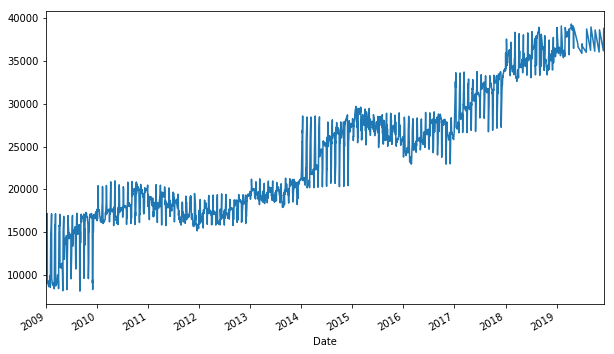

In [24]:
plt.figure(figsize=(10,6))
df['Close'].plot()

<Figure size 720x432 with 0 Axes>

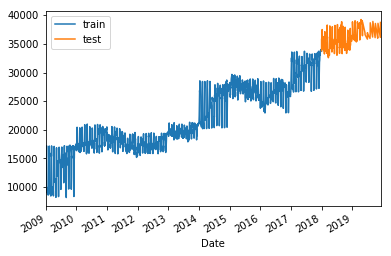

In [27]:
split_date=pd.to_datetime('2018-01-01')
df_train = df.loc[:split_date]
df_test = df.loc[split_date:]
plt.figure(figsize=(10,6))
ax = df_train.plot()
df_test.plot(ax=ax)
plt.legend(['train','test'])

In [28]:
print(df.shape,df_train.shape,df_test.shape)

(2557, 1) (2231, 1) (327, 1)


In [0]:
scaler=MinMaxScaler(feature_range=(-1,1))
train_sc=scaler.fit_transform(df_train)
test_sc=scaler.transform(df_test)

In [0]:
X_train = train_sc[:-1]
Y_train = train_sc[1:]

X_test = test_sc[:-1]
Y_test = test_sc[1:]

# DNN Model

In [34]:
dnn_model = Sequential()
dnn_model.add(Dense(12,input_dim=1,activation='relu'))
dnn_model.add(Dense(1))
dnn_model.compile(loss='mean_squared_error',optimizer='adam')
early_stop = EarlyStopping(monitor='loss',patience=2,verbose=1)
history= dnn_model.fit(X_train,Y_train,epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
2230/2230 [==============================] - 3s 1ms/step - loss: 0.0122
Epoch 2/100
2230/2230 [==============================] - 2s 803us/step - loss: 0.0013
Epoch 3/100
2230/2230 [==============================] - 2s 795us/step - loss: 4.4161e-04
Epoch 4/100
2230/2230 [==============================] - 2s 801us/step - loss: 4.1790e-04
Epoch 5/100
2230/2230 [==============================] - 2s 798us/step - loss: 4.4073e-04
Epoch 6/100
2230/2230 [==============================] - 2s 805us/step - loss: 4.3913e-04
Epoch 00006: early stopping


In [39]:
Y_test_pred_dnn = dnn_model.predict(X_test)
Y_train_pred_dnn = dnn_model.predict(X_train)

print("The R2 score on the train set is:\t{:0.3f}".format(r2_score(Y_train, Y_train_pred_dnn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_test, Y_test_pred_dnn)))

The R2 score on the train set is:	0.968
The R2 score on the Test set is:	0.947


# LSTM Model

In [0]:
train_sc_df = pd.DataFrame(train_sc,columns=['Y'],index=df_train.index)
test_sc_df = pd.DataFrame(test_sc,columns=['Y'],index=df_test.index)

In [0]:
for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

In [0]:
X_train = train_sc_df.dropna().drop('Y',axis=1)
Y_train = train_sc_df.dropna().drop('X_1',axis=1)

X_test = test_sc_df.dropna().drop('Y',axis=1)
Y_test = test_sc_df.dropna().drop('X_1',axis=1)

In [54]:
print(X_train.head())
print(Y_train.head())

                 X_1
Date                
2009-02-01 -0.865382
2009-05-01 -0.861153
2009-06-01 -0.836642
2009-07-01 -0.831982
2009-09-01 -0.889832
                   Y
Date                
2009-02-01 -0.861153
2009-05-01 -0.836642
2009-06-01 -0.831982
2009-07-01 -0.889832
2009-09-01 -0.903765


In [55]:
X_train = X_train.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
Y_train = Y_train.values

In [0]:
X_test = X_test.values
Y_test = Y_test.values

In [0]:
X_train_lmse = X_train.reshape(X_train.shape[0],X_train.shape[1],1)

In [0]:
X_test_lmse = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [73]:
print('X_train_lmse shape: ', X_train_lmse.shape)
print('X_test_lmse shape: ', X_test_lmse.shape)

X_train_lmse shape:  (2230, 1, 1)
X_test_lmse shape:  (326, 1, 1)


In [76]:
lstm_model = Sequential()
lstm_model.add(LSTM(7,input_shape=(1,X_train_lmse.shape[1]), activation='relu', kernel_initializer='lecun_uniform',return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
early_stop = EarlyStopping(monitor='loss',patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train_lmse, Y_train, epochs=100, batch_size=1, verbose=1, shuffle=False,callbacks=[early_stop])

Epoch 1/100
2230/2230 [==============================] - 5s 2ms/step - loss: 0.0417
Epoch 2/100
2230/2230 [==============================] - 4s 2ms/step - loss: 0.0058
Epoch 3/100
2230/2230 [==============================] - 4s 2ms/step - loss: 3.5019e-04
Epoch 4/100
2230/2230 [==============================] - 4s 2ms/step - loss: 3.6268e-04
Epoch 5/100
2230/2230 [==============================] - 4s 2ms/step - loss: 3.9197e-04
Epoch 00005: early stopping


In [0]:
Y_test_pred_lstm = lstm_model.predict(X_test_lmse)
Y_train_pred_lstm = lstm_model.predict(X_train_lmse)

In [78]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(Y_train,Y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_test,Y_test_pred_lstm)))

The R2 score on the Train set is:	0.972
The R2 score on the Test set is:	0.916


In [79]:
dnn_test_mse = dnn_model.evaluate(X_test,Y_test, batch_size=1)
lstm_test_mse = lstm_model.evaluate(X_test_lmse,Y_test, batch_size=1)
print('NN: %f'%dnn_test_mse)
print('LSTM: %f'%lstm_test_mse)

326/326 [==============================] - 0s 1ms/step
NN: 0.000755
LSTM: 0.001200


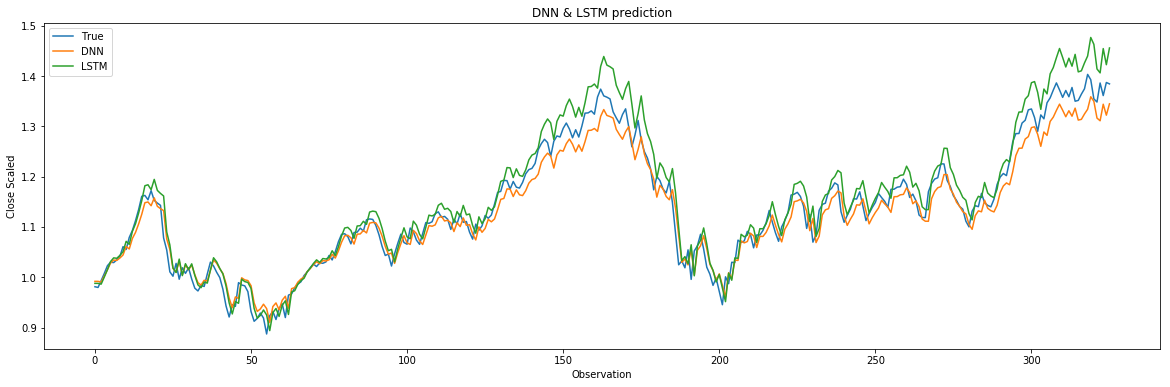

In [82]:
dnn_y_pred_test = dnn_model.predict(X_test)
lstm_y_pred_test = lstm_model.predict(X_test_lmse)

plt.figure(figsize=(20,6))
plt.plot(Y_test,label='True')
plt.plot(dnn_y_pred_test,label='DNN')
plt.plot(lstm_y_pred_test,label='LSTM')
plt.title("DNN & LSTM prediction")
plt.xlabel("Observation")
plt.ylabel("Close Scaled")
plt.legend()
plt.show()